In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
    number1: int
    number2: int
    op: str
    final_number: int

In [6]:
def adder(state: AgentState) -> AgentState:
    state['final_number'] = state['number1'] + state['number2']
    return state

def subtractor(state: AgentState) -> AgentState:
    state['final_number'] = state['number1'] - state['number2']
    return state

def decision_maker(state: AgentState) -> AgentState:
    if state['op'] == '+':
        return "additional_operation"
    
    elif state['op'] == '-':
        return "subtraction_operation"

In [9]:
graph = StateGraph(AgentState)
graph.add_node("addition", adder)
graph.add_node("subtraction", subtractor)
graph.add_node("router", lambda state:state)

graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router",
    decision_maker,
    {
        # edge:node
        "additional_operation": "addition",
        "subtraction_operation": "subtraction",
    }
)

graph.add_edge("addition", END)
graph.add_edge("subtraction", END)
app = graph.compile()


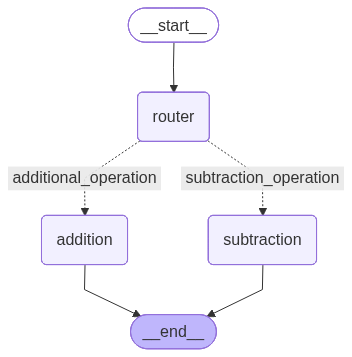

In [10]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [11]:
result = app.invoke({
    "number1": 15,
    "number2": 5,
    "op": "-",
    })
print(result['final_number'])

10


In [12]:
result = app.invoke({
    "number1": 15,
    "number2": 5,
    "op": "+",
    })
print(result['final_number'])

20
